In [57]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from random import randrange #(this function exclude the upper bound)


Simulate occasionally unfair casino: 
first dice dice has equal probabilities of each face P(i) = 1/6; i = 1; 2; 3; 4; 5; 6 
seconddice has probability P(6) = 0,5 and all
other outcomes have probability 0,1. 
So we can build an emission matrix MxK noted 'emi' in our program
The probability to switch from the fair dice to the loaded dice is 0,05 , 
the probability to switch from the loaded to the fair diceis 0,1.
So we can build an tranzition matrix MxM noted tran in our program.

the distribution starts in state 0 with a vector of size M (in our example M = 2)
so (p(F),p(L)). probability to start with a fair or a loaded dice.
and p(F) + p(L) = 1     
we solved the linear system obtained to found the following result : probability to start with the loaded dice = 2/3 , probability to start with the loaded dice = 1/3
let's note it 'strt' . str = (2/3 , 1/3)


In [58]:
tran = np.array([[0.95, 0.05], [0.1, 0.9]]) #Transition matrice MxM
emi = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]) #emission matrice MxK
K = 6
M = 2
L = 300 #300 random rolls of a die as discribed in the example 
strt = np.array([2/3, 1/3])

In [59]:
#check that we have complied with the conditions of departure
C = strt.dot(tran) #strt * tran = strt 
print(C)

[0.66666667 0.33333333]


In [60]:
def HMM(strt, emi, tran, L): 
    rolls = np.zeros((300,), dtype=int) #die roll result i for i ranging from 1 to 300
    die   = np.zeros((300,), dtype=int) #hidden sequence, 1 for fair dice, and 0 for loaded dice
    init  = rd.random()#randomly generate a number between 0 and 1 
    init1  = rd.random()
    i     = 1
    j     = 1
    
    
    if init < strt[0]: #the fair dice will be used 
        die[0] = 1
        rolls[0] = rd.randrange(1, 7) #randomly generate an integer between 1 and 6
    else:#the loaded dice will be used
        die[0] = 0
        if init1 < emi[1, 5]:
            rolls[0] = 6 
        else:
            rolls[0] = rd.randrange(1, 6)
    
    
    #this cycle handle the transition states and fill the hidden sequence puting 1 for fair and 0 for loaded
    while i < L:
        gen   = rd.random()
        if die[i-1] == 0:
            if gen < tran[1, 0]:
                die[i] = 1
            else:
                die[i] = 0
        else:
            if gen < tran[0, 1]:
                die[i] = 0
            else:
                die[i] = 1
        i += 1
    
    
    if i == L:
        #this cycle will fill the list of observations
        while j < L: 
            gen2 = rd.random()
            if die[j] == 0:
                if gen2 < emi[1, 5]:
                    rolls[j] = 6
                else:
                    rolls[j] = rd.randrange(1, 6)
            else:
                rolls[j] = rd.randrange(1, 7)
            j += 1
    
    return(rolls, die)


rolls, die = HMM(strt, emi, tran, L)


print(rolls)
print('\n')
print(die)
    

[6 4 6 4 4 6 1 6 5 6 6 4 2 4 1 5 2 5 5 1 3 2 5 2 4 6 3 1 3 6 4 4 4 2 2 2 2
 6 4 3 4 6 5 2 6 5 6 4 4 1 1 1 6 2 1 2 4 3 1 1 1 3 5 5 6 6 3 6 1 2 3 3 4 4
 3 3 6 2 1 2 2 5 5 4 2 2 4 6 1 6 2 6 6 2 1 6 1 3 3 2 4 4 3 6 5 6 4 2 3 2 4
 6 6 4 4 4 1 1 1 6 3 4 2 1 6 3 6 2 5 4 5 5 3 5 3 3 5 2 6 6 6 6 1 5 3 4 6 4
 2 2 3 5 2 5 6 3 4 1 6 5 3 3 1 6 1 5 5 1 3 2 4 6 1 4 2 4 6 6 2 6 6 5 1 6 6
 5 1 3 3 3 3 5 5 2 6 6 1 2 6 6 3 1 6 1 2 4 1 6 6 3 6 6 4 6 5 3 2 2 2 4 6 4
 3 6 2 2 1 5 2 1 4 3 5 5 2 6 6 6 1 6 4 6 2 6 2 4 5 6 4 5 6 4 3 4 5 3 3 4 3
 2 5 4 2 3 6 3 6 4 3 6 6 6 3 6 6 6 6 5 1 4 4 6 6 2 3 3 3 3 2 2 5 3 6 6 6 6
 5 5 6 1]


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 

In [69]:
def viterbi(rolls, strt, tran, emi):
    V = np.zeros((2, 300))
    die_recursion = np.zeros((2, len(rolls)), dtype=int)
    die_viterbi = np.zeros((300,), dtype=int)
    st = 0
    
    #Initialisation    
    while st < 2:
        V[st][0]=np.log(strt[st])+np.log(emi[st][rolls[0] - 1])
        st += 1
    
    #recursion    
    for i in range(1, len(rolls)):
        st = 0
        while st < 2:
            V[st][i] = np.log(emi[st][rolls[i] - 1])+ max(V[st][i - 1] + np.log(tran[st][st]),V[(1+st)*(1-st)][i - 1] + np.log(tran[(1+st)*(1-st)][(1+st)*(1-st)]))
          
            if V[st][i - 1] > V[(1+st)*(1-st)][i - 1]:
                die_recursion[st][i - 1] = (1+st)*(1-st)
            else:
                die_recursion[st][i - 1] = st
            st += 1  
    
             
    #termination
    i = 0
    if V[i][len(rolls) - 1] > V[i*(1-i)][len(rolls) - 1]:
        die_viterbi[len(rolls) - 1] = 0
    else:
        die_viterbi[len(rolls) - 1] = 1
    for i in range(len(rolls) - 1):
        die_viterbi[len(rolls) - (i + 2)] = die_recursion[die_viterbi[len(rolls) - (i + 1)]][len(rolls) - (i + 2)]
    
    return (die_viterbi)


die_viterbi = viterbi(rolls, strt, tran, emi)    


So, the unfair casino used the following dices to generate the emission sequence:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 1]
/////////////////////////////////////////////////////////////////////////////
[0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 

So, the unfair casino used the following dices to generate the emission sequence:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 1]
/////////////////////////////////////////////////////////////////////////////
[0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 

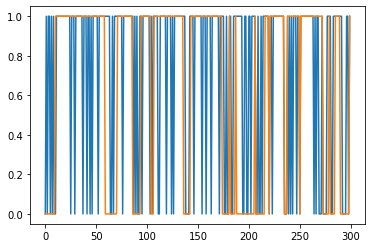

In [71]:

print('So, the unfair casino used the following dices to generate the emission sequence:')
print(die)
print('/////////////////////////////////////////////////////////////////////////////')
print(die_viterbi)



cnt = 0
for i in range(L):
    if die[i] == die_viterbi[i]:
        cnt += 1
pct_similar = cnt / L  * 100
print("In our case, Viterbi learns with a reliability of ", pct_similar,'%')

print('the result is shown on the graffic bellow, the orange color shows the hiden sequence noted die')
print('the blue color shows the viterbi path noted die_viterbi')

plt.plot(die_viterbi)
plt.plot(die)
plt.show()



What is the probability P(S) that this sequence S was generated by the
HMM model?
This probability P(S) is given by the sum of the probabilities pi
(S) of each
possible path that produces this sequence.
The probability P(S) can be computed by dynamical programming using
either the so-called Forward or the Backward algorithm.

In [63]:
#the forward algorithm

def forward(emi, tran, rolls):
    forward_pbs = np.zeros((2, 300))
    i = 0
    
#initialisation    
    while i < 2:
        forward_pbs[i][i * (1-i)] = emi[i][rolls[0]-1] * strt[i]
        i += 1
    
    for i in range(1, len(rolls)):
        j = 0
        while j < 2: 
            forward_pbs[j][i] = emi[j][rolls[i-1]-1]*(forward_pbs[j][i-1]*tran[j][j] + forward_pbs[(1+j) * (1-j)][i-1]*tran[(1+j) * (1-j)][j])
            j += 1      
    return(forward_pbs)


forward_pbs  = forward(emi, tran, rolls)
forward_prob = forward_pbs[0][-1] + forward_pbs[1][-1]


print ('the forward probability is:')
print(forward_prob)
print('\n')
print('//////////////////////////////////////////////////////////////////')
print(forward_pbs)


the forward probability is:
1.8361559472789777e-229


//////////////////////////////////////////////////////////////////
[[1.11111111e-001 2.03703704e-002 4.52160494e-003 8.34284979e-004
  1.87243013e-004 3.46796443e-005 5.95950232e-006 1.16888911e-006
  2.05847845e-007 4.24277941e-008 7.62005773e-009 1.63023304e-009
  4.51971009e-010 8.91444991e-011 1.57346280e-011 2.64455221e-012
  4.33823237e-013 7.02682807e-014 1.13041272e-014 1.81172428e-015
  2.89769727e-016 4.62933882e-017 7.39112028e-018 1.17963854e-018
  1.88236033e-019 3.00337355e-020 4.79170052e-021 7.87561551e-022
  1.27695361e-022 2.05538927e-023 3.29519908e-024 5.48678704e-025
  8.95732245e-026 1.44710691e-026 2.32469482e-027 3.72292400e-028
  5.95194361e-029 9.50651764e-030 1.51759320e-030 2.49824198e-031
  4.05404389e-032 6.52836618e-033 1.04688805e-033 1.74430960e-034
  2.84861076e-035 4.60294480e-036 7.82358794e-037 1.29077383e-037
  2.31049932e-038 3.90914372e-039 6.43449953e-040 1.04410536e-040
  1.68130754e-041 2.6

In [64]:
#the backward algorithm

def backward(emi, tran, rolls):
    backward_pbs = np.zeros((2, 300))
    i = 0
    
    while i < 2:
        backward_pbs[i][-1] = 1
        i += 1
        
    for j in range(len(rolls)-2,-1,-1):
        i = 0
        while i < 2:
            backward_pbs[i][j] = (emi[i][rolls[j]-1]*backward_pbs[i][j+1]*tran[i][i] + emi[(1+i)*(1-i)][rolls[j]-1]*backward_pbs[(1+i)*(1-i)][j+1]*tran[i][(1+i)*(1-i)])
            i += 1
    return(backward_pbs)


backward_pbs = backward(emi, tran, rolls)
backward_prob = backward_pbs[0][0]*strt[0] + backward_pbs[1][0]*strt[1]


print ('the backward probability is:')
print(backward_prob)
print('\n')
print('//////////////////////////////////////////////////////////////////')
print(backward_pbs)



the backward probability is:
4.79008838537247e-229


//////////////////////////////////////////////////////////////////
[[2.51499710e-229 1.26810624e-228 7.34021066e-228 3.91561931e-227
  2.32656096e-226 1.31435794e-225 6.61713824e-225 3.82738987e-224
  2.03826819e-223 1.21017529e-222 6.82588546e-222 4.15374829e-221
  2.60368235e-220 1.63204438e-219 1.02298437e-218 6.41200106e-218
  4.01879451e-217 2.51859198e-216 1.57814747e-215 9.88570044e-215
  6.18918688e-214 3.87113904e-213 2.41704123e-212 1.50436236e-211
  9.30911978e-211 5.69931094e-210 3.41941345e-209 2.13206412e-208
  1.32367938e-207 8.15345652e-207 4.94891050e-206 3.09916457e-205
  1.93930460e-204 1.21184131e-203 7.55365630e-203 4.68694125e-202
  2.88393962e-201 1.74694739e-200 1.02657393e-199 6.35017980e-199
  3.88508742e-198 2.32784987e-197 1.33816923e-196 8.20613592e-196
  4.93897311e-195 2.86516281e-194 1.76340244e-193 1.06867289e-192
  6.68850489e-192 4.18098230e-191 2.60771846e-190 1.61989544e-189
  9.98838979e-189 6.07

the result of the posterior decoding:


///////////////
[[0.15218975]
 [0.1406841 ]
 [0.18075552]
 [0.17791203]
 [0.23725233]
 [0.24824398]
 [0.21476853]
 [0.24365002]
 [0.22850625]
 [0.27963348]
 [0.28327464]
 [0.36879099]
 [0.64089814]
 [0.79234979]
 [0.87662917]
 [0.92349844]
 [0.94950892]
 [0.96384585]
 [0.97157214]
 [0.97541625]
 [0.97673566]
 [0.97599631]
 [0.9729371 ]
 [0.96647772]
 [0.95433712]
 [0.93222799]
 [0.89234279]
 [0.91448209]
 [0.92055207]
 [0.91269628]
 [0.88814054]
 [0.92608997]
 [0.94605127]
 [0.95507352]
 [0.95634282]
 [0.95030741]
 [0.93483596]
 [0.90446491]
 [0.84846912]
 [0.86399447]
 [0.85778743]
 [0.82765608]
 [0.76295991]
 [0.77956568]
 [0.76623187]
 [0.71824979]
 [0.75135961]
 [0.75125155]
 [0.84163799]
 [0.89012378]
 [0.91383105]
 [0.92113173]
 [0.91460396]
 [0.89194254]
 [0.93130161]
 [0.95292109]
 [0.96443561]
 [0.9699114 ]
 [0.97128214]
 [0.9690319 ]
 [0.96236603]
 [0.94893058]
 [0.92398099]
 [0.87870661]
 [0.79711938]
 [0.65040782]
 [0.62297775]
 [0.68

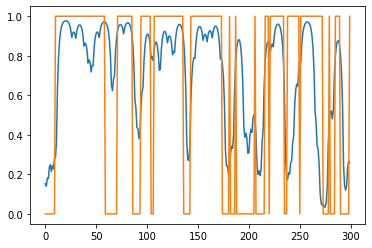

In [65]:
#posterior decoding

def posterior_decoding(forward_pbs, backward_pbs, forward_prob):
    posterior = np.zeros((300, 1))

    for i in range(300):
        posterior[i] = (forward_pbs[0][i]*backward_pbs[0][i])/forward_prob
    return(posterior)


die_posterior = posterior_decoding(forward_pbs, backward_pbs, forward_prob)
print("the result of the posterior decoding:")
print('\n')
print('///////////////')
print(die_posterior)


plt.plot(die_posterior)
plt.plot(die)
plt.show()



In [ ]:
#Baum-Welch training


